In [21]:
import scanpy as sc
import pandas as pd

In [22]:
epi = sc.read_h5ad("../../processed_data/integrated_data/20250414_epi_adata.h5ad")

In [23]:
epi

AnnData object with n_obs × n_vars = 49805 × 27293
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology', 'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development.stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal', 'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID', 'index', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 

In [24]:
epi.X = epi.layers["logcounts"]

In [6]:
sc.pp.highly_variable_genes(epi,batch_key="Sample",n_top_genes = 2000 )

/home/gilberthan/anaconda3/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


KeyboardInterrupt: 

In [12]:
vargene = epi.var_names[epi.var["highly_variable"]]

In [13]:
vargene

Index(['Prex2', 'Sulf1', 'Kcnb2', 'Sbspon', 'Ly96', 'Pi15', 'Crispld1',
       'Tfap2b', 'Mcm3', 'Khdrbs2',
       ...
       'Sprr3', 'Cnfn', 'Krt6b', 'Wnt8b', 'Slc34a2', 'Akain1', 'Esp15',
       '2810417H13Rik', '1700086L19Rik', 'mt-Rnr2'],
      dtype='object', length=2000)

In [18]:
pd.DataFrame(vargene).to_csv("../../processed_data/framework/geneMeta/20250415_epi_vargene.csv")

In [26]:
fitTraj = pd.read_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250414_epi_run_2/fitted_trajectories_optimized.csv",
                    index_col=0)

In [27]:
fitTraj

,Tceal6,E130012A19Rik,Ppm1h,2810417H13Rik,Gm5611,2700094K13Rik,Ntf3,Col5a3,Mettl10,Fam81a,...,Gbf1,B230219D22Rik,A930015D03Rik,Lonp1,Hnrnph1,Ctc1,Ubxn1,Alg8,Tstd3,Papola
0,-0.207739,-0.103148,0.498579,0.332325,0.625343,-0.069852,0.019234,-0.189858,-0.122487,-0.190326,...,-0.570633,-0.527799,-0.344848,-0.438314,0.654540,-0.261181,1.193924,0.271944,-0.153041,1.392769
1,-0.233183,-0.110846,0.493553,0.331995,0.610355,-0.060140,0.020168,-0.179287,-0.128067,-0.180655,...,-0.587785,-0.494324,-0.338284,-0.415664,0.697894,-0.265140,1.124685,0.255008,-0.175106,1.379409
2,-0.255871,-0.117730,0.488133,0.331175,0.595312,-0.050584,0.021237,-0.169267,-0.132809,-0.170995,...,-0.603622,-0.466636,-0.332868,-0.392970,0.737076,-0.266791,1.058133,0.238887,-0.195484,1.364492
3,-0.275825,-0.123821,0.482328,0.329876,0.580219,-0.041188,0.022433,-0.159785,-0.136737,-0.161354,...,-0.618161,-0.444331,-0.328516,-0.370252,0.772192,-0.266231,0.994225,0.223559,-0.214211,1.348063
4,-0.293071,-0.129141,0.476149,0.328111,0.565081,-0.031956,0.023751,-0.150825,-0.139877,-0.151737,...,-0.631421,-0.427009,-0.325147,-0.347528,0.803352,-0.263560,0.932917,0.209008,-0.231325,1.330170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.202549,-0.136614,-0.370452,-0.204748,-0.318649,-0.403850,-0.291205,0.322648,-0.286286,-0.275524,...,1.176206,-0.392967,-0.163994,-0.751328,-0.610913,-0.412526,-0.470017,-0.348934,0.048157,-0.523655
96,-0.204793,-0.161699,-0.368770,-0.197338,-0.315458,-0.427031,-0.309779,0.344387,-0.321121,-0.297685,...,1.203464,-0.379269,-0.129951,-0.810330,-0.595305,-0.395510,-0.455698,-0.373893,0.017419,-0.481566
97,-0.211248,-0.187985,-0.366543,-0.189262,-0.311825,-0.450752,-0.328906,0.366926,-0.357433,-0.320511,...,1.230323,-0.365969,-0.086532,-0.871114,-0.578605,-0.374824,-0.439176,-0.399853,-0.015226,-0.436707
98,-0.222374,-0.215493,-0.363761,-0.180509,-0.307743,-0.475017,-0.348593,0.390280,-0.395248,-0.344010,...,1.256766,-0.353475,-0.033247,-0.933699,-0.560813,-0.350335,-0.420379,-0.426834,-0.049819,-0.389032


In [28]:
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(fitTraj.T)
pivot_df = fitTraj.T
# Add cluster labels to the DataFrame
pivot_df['cluster'] = cluster_labels

# Step 4: Sort the DataFrame by clusters
clustered_df = pivot_df.sort_values('cluster')

# Remove the cluster column before plotting
plot_df = clustered_df.drop('cluster', axis=1)



In [ ]:
clustered_df[["cluster"]].to_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250414_epi_run_2/epi_raw_gene.csv")

<Figure size 1152x864 with 0 Axes>

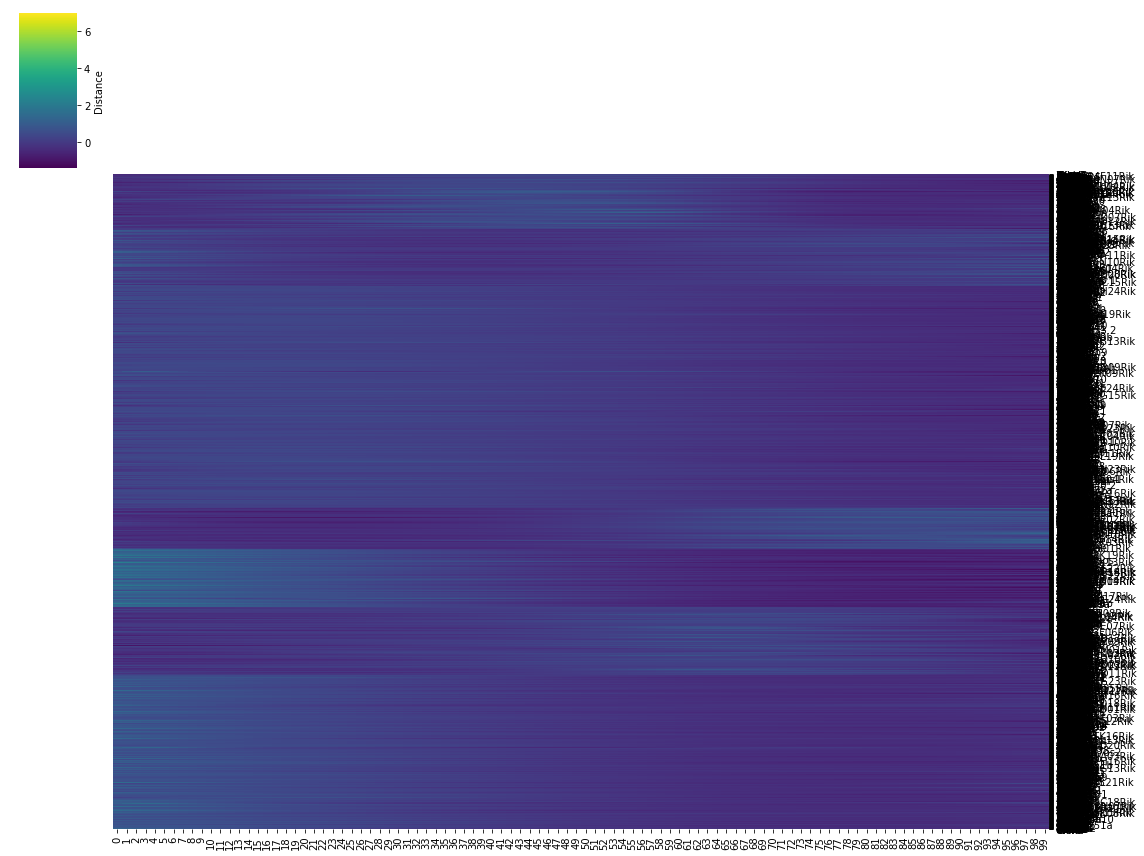

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
# Step 5: Hierarchical clustering for the columns (sample pairs)
# This helps to group similar sample pairs together for better visualization
#col_linkage = linkage(plot_df.T, method='ward')

# Step 6: Create a clustered heatmap
plt.figure(figsize=(16, 12))

# Use clustermap which combines hierarchical clustering with heatmap
g = sns.clustermap(
    plot_df,
    cmap='viridis',
    figsize=(16, 12),
    row_cluster=False,
    col_cluster=False,        # Don't cluster rows (already clustered by K-means)
    xticklabels=True,         # Show column labels
    yticklabels=True,         # Show row labels
    cbar_kws={'label': 'Distance'},
    dendrogram_ratio=(0.1, 0.2),  # Adjust size of dendrograms
)

In [58]:
plot_df[cluster_labels]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Tceal6,-0.207739,-0.233183,-0.255871,-0.275825,-0.293071,-0.307631,-0.319531,-0.328795,-0.335447,-0.339511,...,-0.238304,-0.226431,-0.216456,-0.208843,-0.204053,-0.202549,-0.204793,-0.211248,-0.222374,-0.238636
Nfkb2,-0.450546,-0.408792,-0.368478,-0.329588,-0.292101,-0.256001,-0.221269,-0.187886,-0.155835,-0.125098,...,-0.325479,-0.340525,-0.355374,-0.370009,-0.384410,-0.398560,-0.412441,-0.426033,-0.439320,-0.452283
Thoc3,-0.025074,-0.052512,-0.077205,-0.099197,-0.118529,-0.135242,-0.149379,-0.160981,-0.170091,-0.176750,...,-0.339064,-0.326678,-0.314742,-0.303565,-0.293456,-0.284725,-0.277680,-0.272631,-0.269886,-0.269755
Ap1s3,0.115306,0.099665,0.084295,0.069289,0.054738,0.040735,0.027372,0.014742,0.002937,-0.007951,...,-0.405138,-0.392995,-0.380126,-0.366719,-0.352959,-0.339034,-0.325131,-0.311436,-0.298136,-0.285418
Ifrd2,-0.127385,-0.132134,-0.135857,-0.138542,-0.140176,-0.140747,-0.140244,-0.138655,-0.135967,-0.132168,...,-0.419572,-0.408842,-0.396855,-0.383725,-0.369569,-0.354503,-0.338644,-0.322106,-0.305007,-0.287463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Efnb3,0.593123,0.588240,0.582723,0.576589,0.569856,0.562541,0.554660,0.546231,0.537271,0.527797,...,-0.366972,-0.360104,-0.352324,-0.343614,-0.333957,-0.323337,-0.311736,-0.299136,-0.285522,-0.270875
Barx2,1.224187,1.159235,1.096294,1.035332,0.976315,0.919213,0.863992,0.810622,0.759069,0.709302,...,-0.344589,-0.357297,-0.370887,-0.385391,-0.400841,-0.417269,-0.434708,-0.453188,-0.472744,-0.493406
Prss23,0.639867,0.627313,0.614154,0.600415,0.586121,0.571295,0.555962,0.540147,0.523875,0.507169,...,-0.037654,-0.006652,0.025947,0.060167,0.096033,0.133569,0.172801,0.213751,0.256445,0.300908
Clcn2,0.794293,0.777836,0.761033,0.743899,0.726448,0.708696,0.690657,0.672346,0.653778,0.634967,...,-0.335515,-0.323898,-0.311296,-0.297695,-0.283080,-0.267436,-0.250749,-0.233002,-0.214183,-0.194275


In [63]:
cluster0 = clustered_gene_df.index[clustered_gene_df["cluster"]==0]
cluster1 = clustered_gene_df.index[clustered_gene_df["cluster"]==1]
cluster2 = clustered_gene_df.index[clustered_gene_df["cluster"]==2]
cluster3 = clustered_gene_df.index[clustered_gene_df["cluster"]==3]
cluster4 = clustered_gene_df.index[clustered_gene_df["cluster"]==4]
cluster5 = clustered_gene_df.index[clustered_gene_df["cluster"]==5]
cluster6 = clustered_gene_df.index[clustered_gene_df["cluster"]==6]
cluster7 = clustered_gene_df.index[clustered_gene_df["cluster"]==7]

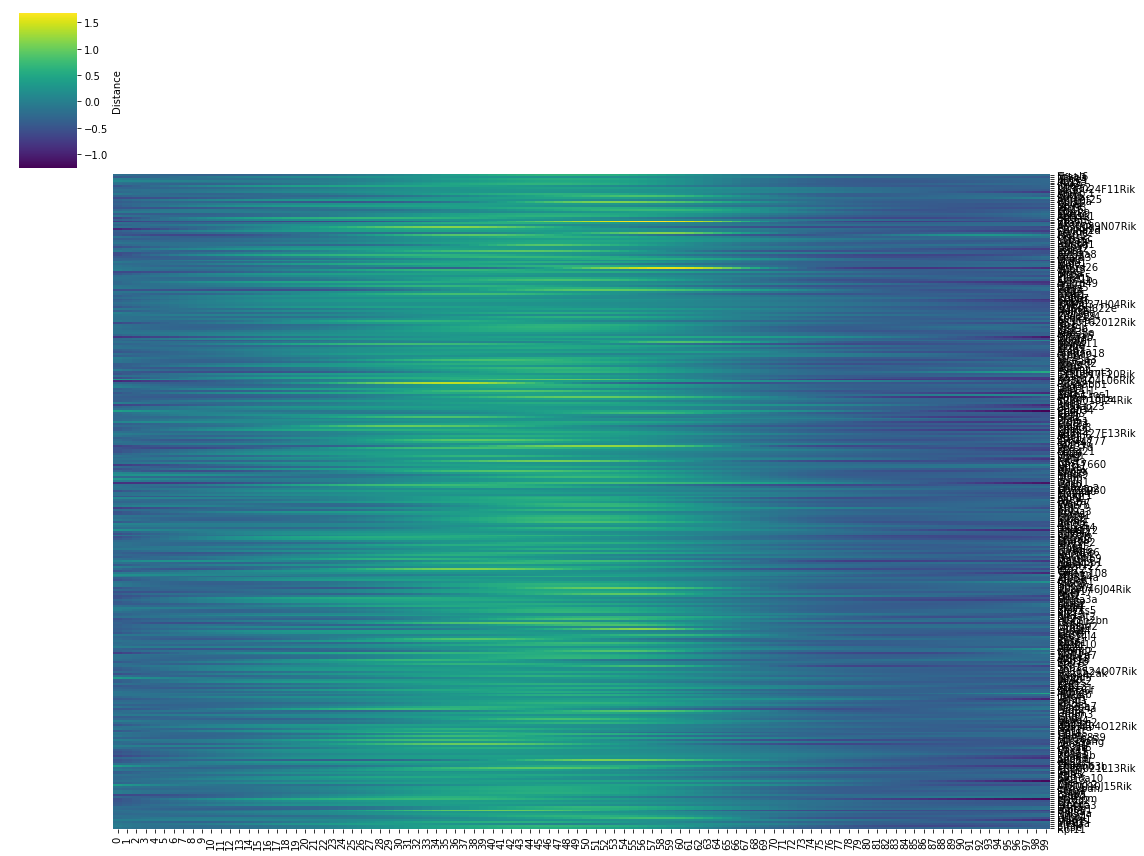

In [68]:
sns.clustermap(
    plot_df.loc[cluster0],
    cmap='viridis',
    figsize=(16, 12),
    row_cluster=False,
    col_cluster=False,        # Don't cluster rows (already clustered by K-means)
    xticklabels=True,         # Show column labels
    yticklabels=True,         # Show row labels
    cbar_kws={'label': 'Distance'},
    dendrogram_ratio=(0.1, 0.2),  # Adjust size of dendrograms
)

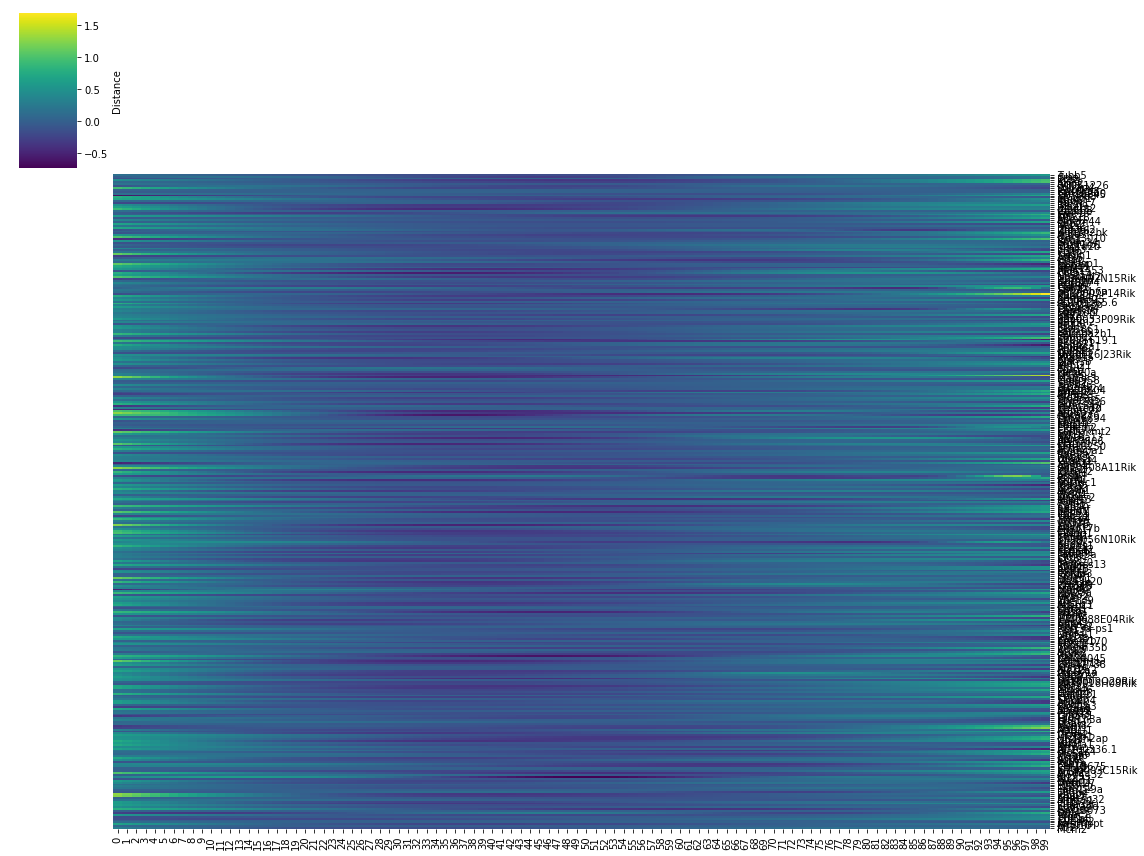

In [69]:
sns.clustermap(
    plot_df.loc[cluster1],
    cmap='viridis',
    figsize=(16, 12),
    row_cluster=False,
    col_cluster=False,        # Don't cluster rows (already clustered by K-means)
    xticklabels=True,         # Show column labels
    yticklabels=True,         # Show row labels
    cbar_kws={'label': 'Distance'},
    dendrogram_ratio=(0.1, 0.2),  # Adjust size of dendrograms
)

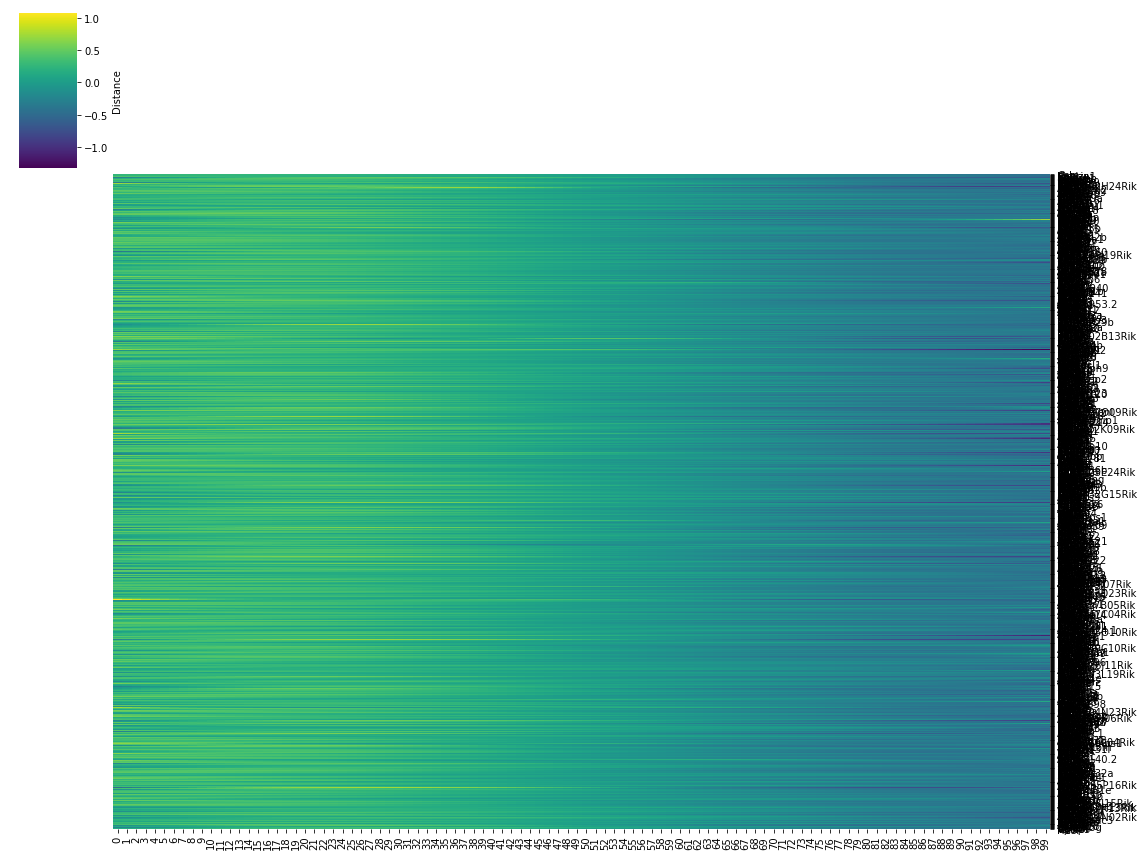

In [70]:
sns.clustermap(
    plot_df.loc[cluster2],
    cmap='viridis',
    figsize=(16, 12),
    row_cluster=False,
    col_cluster=False,        # Don't cluster rows (already clustered by K-means)
    xticklabels=True,         # Show column labels
    yticklabels=True,         # Show row labels
    cbar_kws={'label': 'Distance'},
    dendrogram_ratio=(0.1, 0.2),  # Adjust size of dendrograms
)

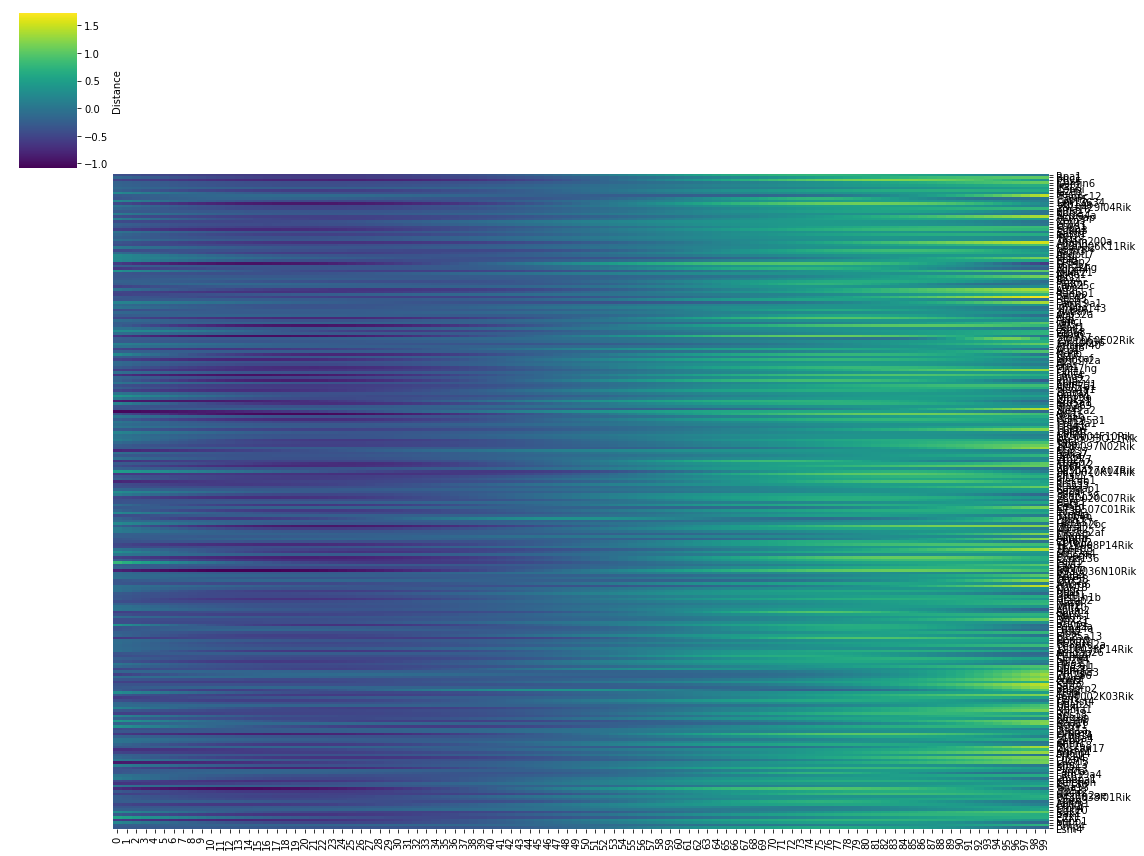

In [71]:
sns.clustermap(
    plot_df.loc[cluster3],
    cmap='viridis',
    figsize=(16, 12),
    row_cluster=False,
    col_cluster=False,        # Don't cluster rows (already clustered by K-means)
    xticklabels=True,         # Show column labels
    yticklabels=True,         # Show row labels
    cbar_kws={'label': 'Distance'},
    dendrogram_ratio=(0.1, 0.2),  # Adjust size of dendrograms
)

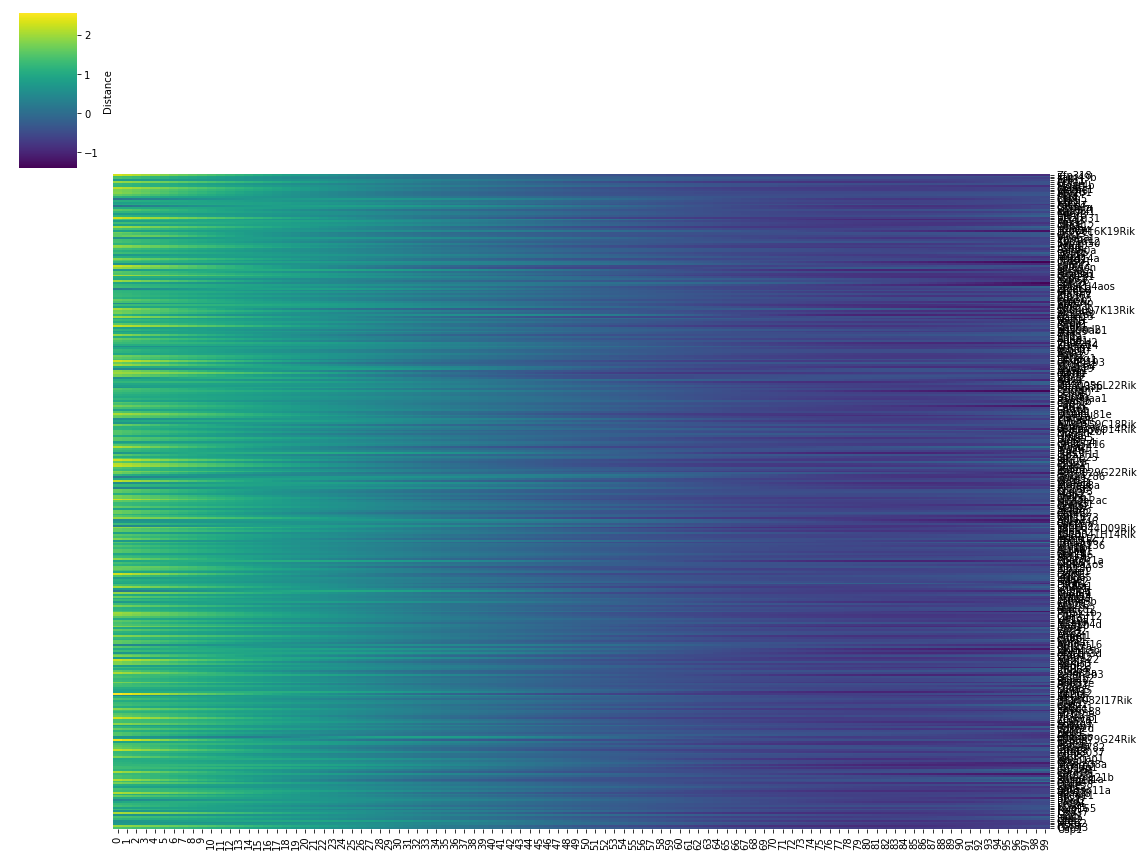

In [72]:
sns.clustermap(
    plot_df.loc[cluster4],
    cmap='viridis',
    figsize=(16, 12),
    row_cluster=False,
    col_cluster=False,        # Don't cluster rows (already clustered by K-means)
    xticklabels=True,         # Show column labels
    yticklabels=True,         # Show row labels
    cbar_kws={'label': 'Distance'},
    dendrogram_ratio=(0.1, 0.2),  # Adjust size of dendrograms
)

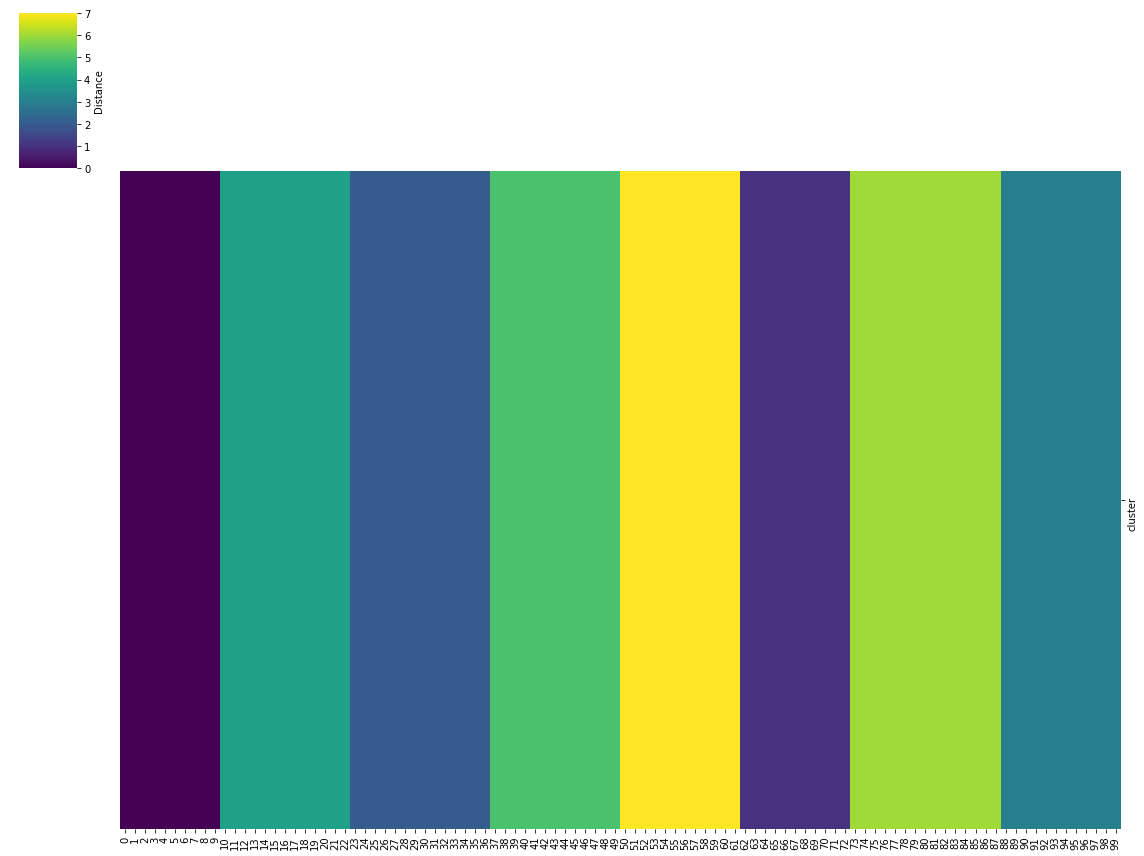

In [73]:
sns.clustermap(
    plot_df.loc[cluster5],
    cmap='viridis',
    figsize=(16, 12),
    row_cluster=False,
    col_cluster=False,        # Don't cluster rows (already clustered by K-means)
    xticklabels=True,         # Show column labels
    yticklabels=True,         # Show row labels
    cbar_kws={'label': 'Distance'},
    dendrogram_ratio=(0.1, 0.2),  # Adjust size of dendrograms
)

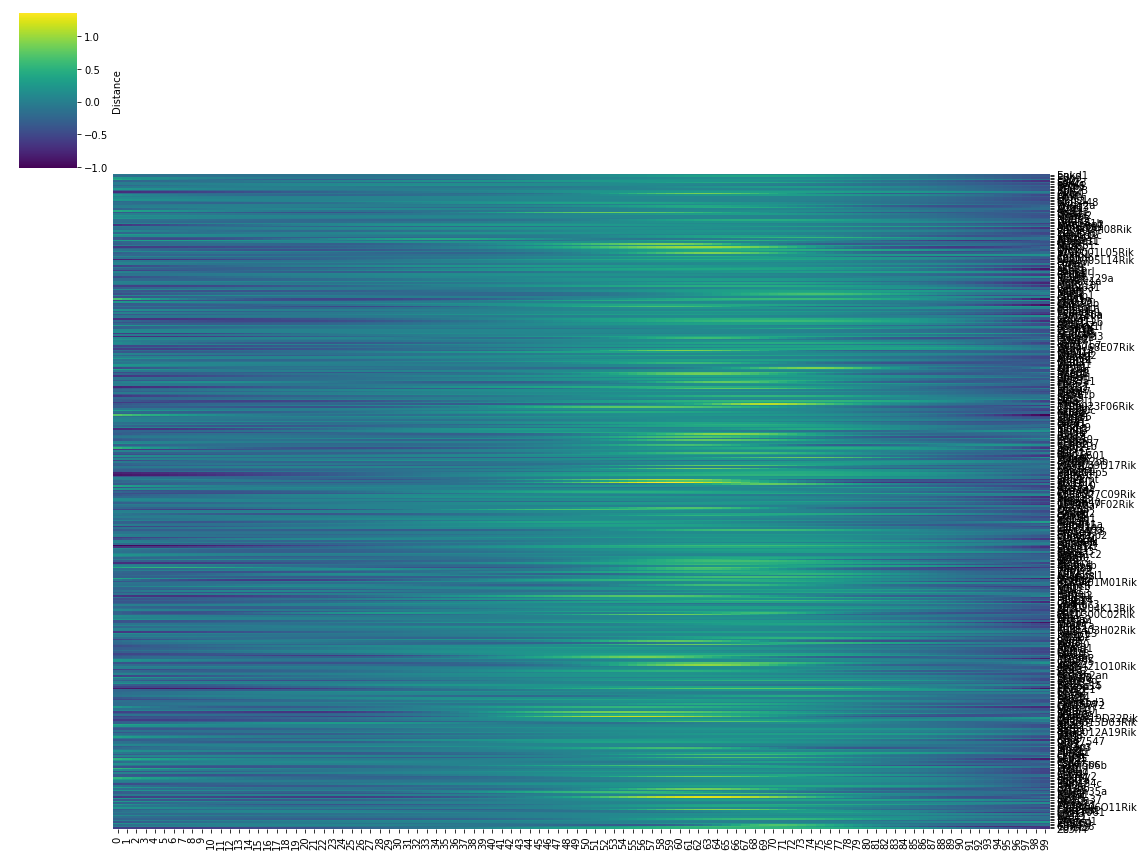

In [74]:
sns.clustermap(
    plot_df.loc[cluster6],
    cmap='viridis',
    figsize=(16, 12),
    row_cluster=False,
    col_cluster=False,        # Don't cluster rows (already clustered by K-means)
    xticklabels=True,         # Show column labels
    yticklabels=True,         # Show row labels
    cbar_kws={'label': 'Distance'},
    dendrogram_ratio=(0.1, 0.2),  # Adjust size of dendrograms
)

In [49]:
clustered_df[["cluster"]].to_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250414_epi_run_2/epi_raw_gene.csv")

In [53]:
conserveScore = pd.read_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250414_epi_run_2/conservation_scores.csv",index_col=0)

In [56]:
clustered_gene_df = clustered_df[["cluster"]]

In [79]:
select = clustered_gene_df.index[clustered_gene_df["cluster"].isin([0,3,6])]

In [81]:
conserveScore_diff = conserveScore[conserveScore["gene"].isin(vargene)&conserveScore["gene"].isin(select)]


In [84]:
conserveScore_diff

,gene,raw_score,normalized_score,n_valid_samples,was_filtered
6977,Th,-4.314405,0.983590,2,False
5550,Fam19a1,-4.825227,0.980760,5,False
11587,Dhfr,-6.456247,0.971723,10,False
11372,Cks2,-7.916894,0.963629,11,False
13881,Uhrf1,-8.156382,0.962303,11,False
...,...,...,...,...,...
8329,Cdh1,-38.352887,0.794990,11,False
932,Otud1,-39.389179,0.789248,5,False
10201,Hist3h2a,-39.420380,0.789076,7,False
7630,Wif1,-39.568868,0.788253,10,False


In [83]:
conserveScore_diff.to_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250414_epi_run_2/epi_conservation_score_diff.csv")

In [8]:
vargene = pd.read_csv("../../processed_data/framework/geneMeta/20250415_epi_vargene.csv",index_col=0)

In [12]:
vargene["0"]

0               Prex2
1               Sulf1
2               Kcnb2
3              Sbspon
4                Ly96
            ...      
1995           Akain1
1996            Esp15
1997    2810417H13Rik
1998    1700086L19Rik
1999          mt-Rnr2
Name: 0, Length: 2000, dtype: object

In [13]:
markergene = pd.read_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250415_GO_downstream/20250415_epimarker_seurat.csv",index_col=0)

In [19]:
markergeneFilter = markergene[markergene.index.isin(vargene["0"])]

In [20]:
markergeneFilter.to_csv("/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250415_GO_downstream/20250415_epimarker_seurat_Filter.csv")

In [15]:
markergene.filter(markergene.index.isin(vargene["0"]))

""
Amelx
Sp6
Satb1
H19
Calb1
...
Ubl7
Anxa11
Mmp9
Clec14a
